### ORP Exploring Data

### Setup

In [71]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

In [72]:
output_dir = '../images'
os.makedirs(output_dir, exist_ok=True)

In [73]:
def save_plot(fig, filename):
    file_path = os.path.join(output_dir, filename)
    fig.savefig(file_path, bbox_inches='tight')
    print(f'Image saved as {file_path}')

#### Recovering the data

In [74]:
import pandas as pd

In [75]:
ML_ROOT_DIR = "../../ml-models"
FOLDER_ID = "datasets"
LDD_PATH = os.path.join(ML_ROOT_DIR, FOLDER_ID)

In [76]:
def load_orpe_data(ldd_path = LDD_PATH):
  csv_path = os.path.join(ldd_path, 'OsteoporosisRiskPrediction.csv')
  return pd.read_csv(csv_path)

#### Understanding the data structure

In [77]:
orpe = load_orpe_data()

In [78]:
orpe.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [79]:
orpe.columns

Index(['Id', 'Age', 'Gender', 'Hormonal Changes', 'Family History',
       'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
       'Physical Activity', 'Smoking', 'Alcohol Consumption',
       'Medical Conditions', 'Medications', 'Prior Fractures', 'Osteoporosis'],
      dtype='object')

In [80]:
# Removing unnecessary columns
orpe = orpe.drop(columns=['Id'])

In [81]:
orpe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1958 non-null   int64 
 1   Gender               1958 non-null   object
 2   Hormonal Changes     1958 non-null   object
 3   Family History       1958 non-null   object
 4   Race/Ethnicity       1958 non-null   object
 5   Body Weight          1958 non-null   object
 6   Calcium Intake       1958 non-null   object
 7   Vitamin D Intake     1958 non-null   object
 8   Physical Activity    1958 non-null   object
 9   Smoking              1958 non-null   object
 10  Alcohol Consumption  970 non-null    object
 11  Medical Conditions   1311 non-null   object
 12  Medications          973 non-null    object
 13  Prior Fractures      1958 non-null   object
 14  Osteoporosis         1958 non-null   int64 
dtypes: int64(2), object(13)
memory usage: 229.6+ KB


In [82]:
# Visualizing the distribution of the target variable
orpe['Osteoporosis'].value_counts()

Osteoporosis
1    979
0    979
Name: count, dtype: int64

In [83]:
orpe.describe()

,Age,Osteoporosis
count,1958.000000,1958.000000
mean,39.101124,0.500000
std,21.355424,0.500128
min,18.000000,0.000000
25%,21.000000,0.000000
50%,32.000000,0.500000
75%,53.000000,1.000000
max,90.000000,1.000000


In [84]:
# histogram for numeric attributes
%matplotlib inline
import matplotlib.pyplot as plt

In [86]:
na_counts = orpe.isna().sum().sort_values(ascending=False)
print("Valores ausentes por coluna:\n", na_counts)

Valores ausentes por coluna:
 Alcohol Consumption    988
Medications            985
Medical Conditions     647
Family History           0
Age                      0
Gender                   0
Hormonal Changes         0
Calcium Intake           0
Body Weight              0
Race/Ethnicity           0
Vitamin D Intake         0
Smoking                  0
Physical Activity        0
Prior Fractures          0
Osteoporosis             0
dtype: int64


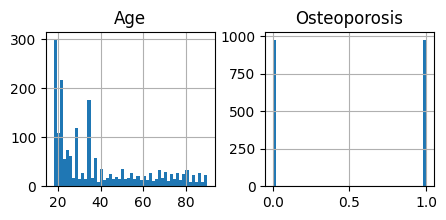

In [87]:
# histogram for numeric attributes
orpe.hist(bins=50, figsize=(5, 2))
plt.show()

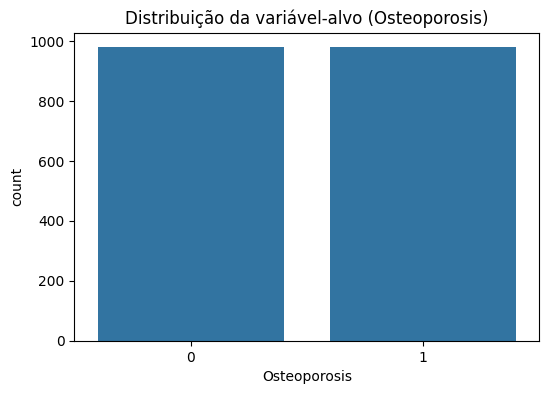

In [94]:
plt.figure(figsize=(6,4))
sns.countplot(data=orpe, x="Osteoporosis")
plt.title("Distribuição da variável-alvo (Osteoporosis)")
plt.show()

In [95]:
numerical_cols = orpe.select_dtypes(include=np.number).columns

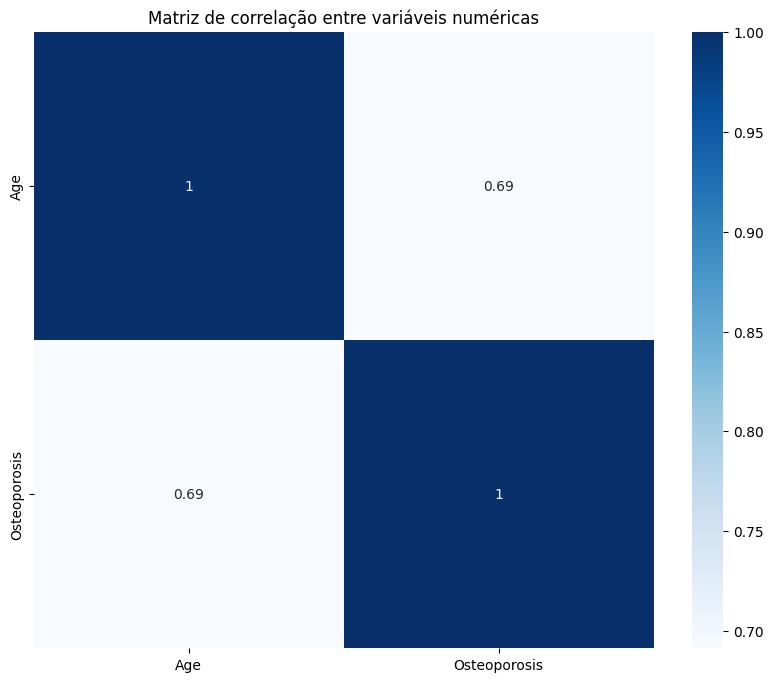

In [97]:
plt.figure(figsize=(10,8))
sns.heatmap(orpe[numerical_cols].corr(), annot=True, cmap="Blues")
plt.title("Matriz de correlação entre variáveis numéricas")
plt.show()

#### Handling missing values

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [114]:
numeric_features = orpe.select_dtypes(include=['int64', 'float64']).columns
categorical_features = orpe.select_dtypes(exclude=['int64', 'float64']).columns

In [115]:
numeric_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

In [116]:
preprocessor = ColumnTransformer(
  transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
  ]
)

In [117]:
orpe_clean = preprocessor.fit_transform(orpe)

In [118]:
orpe_preprocessed = pd.DataFrame(orpe_clean, columns=list(numeric_features) + list(categorical_features))

In [119]:
orpe_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1958 non-null   object
 1   Osteoporosis         1958 non-null   object
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  1958 non-null   object
 12  Medical Conditions   1958 non-null   object
 13  Medications          1958 non-null   object
 14  Prior Fractures      1958 non-null   object
dtypes: object(15)
memory usage: 229.6+ KB


In [122]:
orpe_preprocessed.head()

,Age,Osteoporosis,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures
0,69.0,1.0,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes
1,32.0,1.0,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,Moderate,Hyperthyroidism,Corticosteroids,Yes
2,89.0,1.0,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No
3,78.0,1.0,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,No
4,38.0,1.0,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes


In [120]:
orpe_preprocessed.describe()

,Age,Osteoporosis,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures
count,1958.0,1958.0,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958
unique,73.0,2.0,2,2,2,3,2,2,2,2,2,1,2,1,2
top,18.0,1.0,Male,Normal,No,African American,Normal,Low,Sufficient,Active,Yes,Moderate,Hyperthyroidism,Corticosteroids,Yes
freq,152.0,979.0,992,981,998,681,1027,1004,1011,1021,982,1958,1325,1958,983


### Saving the dataset

In [124]:
orpe_preprocessed.to_csv("orp_preprocessed.csv", index=False)
print("✔ Arquivo salvo: orp_preprocessed.csv")

✔ Arquivo salvo: orp_preprocessed.csv
